# Day 39 Assignment

__Question :__
    
__Do the market basket analysis with Bread_Basket dataset.__

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#load data
df = pd.read_csv("C:/Users/Sidhartha/Downloads/letsupgrade materials/BreadBasket_DMS - Arindam Dev.csv")
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [7]:
df.shape

(21293, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction,21293.0,4951.990889,2787.7584,1.0,2548.0,5067.0,7329.0,9684.0


In [10]:
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

In [12]:
# List how many null values for each feature:

print(df.isnull().sum())

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [13]:
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


In [19]:
#Clearly we have 'NONE' values in our dataset. 
#This is either saying that no item was purchased, or the name of the item was not logged.
#Either way, this is of no use to us so we drop these rows.

df.drop(df[df['Item']=='NONE'].index, inplace=True)
print(df[df['Item']=='NONE'])

Empty DataFrame
Columns: [Date, Time, Transaction, Item]
Index: []


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [26]:
# Year
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1,Bread,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016,10,30


In [27]:
#Let's check the most sold items from the bakery:
most_sold = df['Item'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Name: Item, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

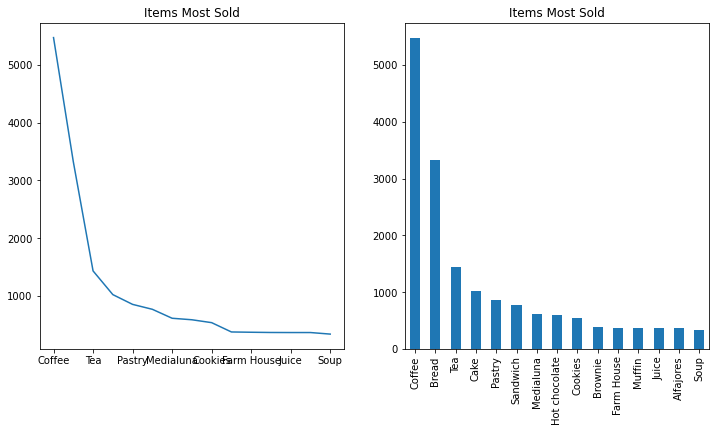

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

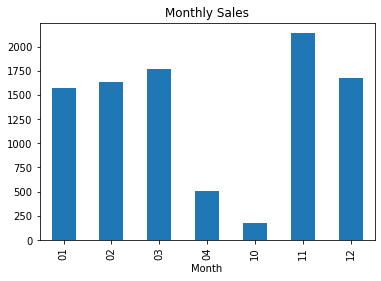

In [29]:
#Clearly coffee is the most sold item, followed by bread, tea, cake, and pastry, respectively. 
#This makes sense for a bakery. Now that we know which are the most popular items,
#let's check out which months bring in the most sales.

df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [30]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


# Market Basket Analysis

In [35]:
!pip install mlxtend

In [36]:
# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [37]:
#Let's now create a list of the unique transactions
#so that we can transform our data into the correct format using TransactionEncoder.

transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [39]:
from mlxtend.preprocessing import TransactionEncoder

In [40]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [41]:
#Now let's apply apriori. 
#I will use the min_threshold parameter in the
#association rules for the lift metric to be 1.0 because if it is less
#than one, then the two items are not likely to be bought together (see Theory above). 
#We will sort the values by confidence to see the likelihood that an item is bought if its antecedent is bought.

In [42]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


__Conclusions__

__Very cool! We clearly see meaningful results here from our analysis shown above, where the higher the lift value, the stronger the correlation between the items. The data clearly shows that coffee is a popular consequent, which makes sense because it is a bakery. Besides coffee,let's look at the more interesting item correlations (format: antecedant(s) -> consequent)__

Pastry -> Bread

Cake -> Tea

(Coffee + Tea) -> Cake

Sandwhich -> Tea

Hot Chocolate -> Cake